In [2]:
import numpy as np
import matplotlib.pyplot as plt

from urdfpy import URDF
from sympy import Matrix, symbols, Identity, cos, sin, zeros, simplify, init_printing, print_latex, Function, var, Eq, collect, expand

In [3]:
# Kinematic analysis of a double pendulum
l1, l2 = symbols('l1 l2')
r1, r2 = symbols('r1 r2')
m1, m2 = symbols('m1 m2')
I1, I2 = symbols('I1 I2')
g = symbols('g')

t = symbols('t')
q1, q2 = Function('q1')(t), Function('q2')(t)
dq1, dq2 = q1.diff(t), q2.diff(t)
ddq1, ddq2 = dq1.diff(t), dq2.diff(t)

x1 = r1 * sin(q1)
y1 = -r1 * cos(q1)
x2 = l1 * sin(q1) + r2 * sin(q1 + q2)
y2 = -l1 * cos(q1) - r2 * cos(q1 + q2)

dx1 = x1.diff(t)
dy1 = y1.diff(t)
dx2 = x2.diff(t)
dy2 = y2.diff(t)

### 1. Calculate EOM

In [4]:
# Calculate the kinetic energy of the system
# Kinetic energy of the first link
K1 = 1/2 * m1 * (dx1**2 + dy1**2) + 1/2 * I1 * dq1**2
# Kinetic energy of the second link
K2 = 1/2 * m2 * (dx2**2 + dy2**2) + 1/2 * I2 * (dq1 + dq2)**2
K= simplify(K1 + K2)
print(f"Kinetic energy of the system is:\n")
display(K.subs({(dq1, symbols('qdot1')),
    (dq2, symbols('qdot2')),
    (q1, symbols('q1')),
    (q2, symbols('q2'))}))

# Calculate the potential energy of the system
# Potential energy of the first link
V1 = m1 * g * y1
# Potential energy of the second link
V2 = m2 * g * y2
V = V1 + V2
print(f"Potential energy of the system is:\n")
display(V.subs({(q1, symbols('q1')),
    (q2, symbols('q2'))}))

# Lagrangian of the system
L = K - V
L = simplify(L)
print(f"Lagrangian of the system is:\n") 
display(L.subs({(dq1, symbols('qdot1')),
    (dq2, symbols('qdot2')),
    (q1, symbols('q1')),
    (q2, symbols('q2'))}))

# Lagrange equations
q = [q1, q2]

dL_dq = [L.diff(qi) for qi in q]
dL_dq_dot = [L.diff(qi.diff(t)) for qi in q]
ddt_dL_dq_dot = [dL_dq_dot[i].diff(t) for i in range(len(q))]

#Equations of motion
EOM = [ddt_dL_dq_dot[i] - dL_dq[i] for i in range(len(q))]
EOM = [simplify(eq) for eq in EOM]


subs_dict = [
    (ddq1, symbols('qddot1')),
    (ddq2, symbols('qddot2')),
    (dq1, symbols('qdot1')),
    (dq2, symbols('qdot2')),
    (q1, symbols('q1')),
    (q2, symbols('q2'))
]

EOM_readable = [eq.subs(subs_dict) for eq in EOM]

print(f"Equations of motion of the system are:\n")
tau1 = symbols('tau_1')
tau2 = symbols('tau_2')
tau = Matrix([[tau1], [tau2]])
for i, eq in enumerate(EOM_readable):
    print(f"Equation {i+1}:")
    display(Eq(tau[i], eq))
    print("\n")



Kinetic energy of the system is:



0.5*I1*qdot1**2 + 0.5*I2*(qdot1 + qdot2)**2 + 0.5*m1*qdot1**2*r1**2 + 0.5*m2*(l1**2*qdot1**2 + 2*l1*qdot1**2*r2*cos(q2) + 2*l1*qdot1*qdot2*r2*cos(q2) + qdot1**2*r2**2 + 2*qdot1*qdot2*r2**2 + qdot2**2*r2**2)

Potential energy of the system is:



-g*m1*r1*cos(q1) + g*m2*(-l1*cos(q1) - r2*cos(q1 + q2))

Lagrangian of the system is:



0.5*I1*qdot1**2 + 0.5*I2*(qdot1 + qdot2)**2 + g*m1*r1*cos(q1) + g*m2*(l1*cos(q1) + r2*cos(q1 + q2)) + 0.5*m1*qdot1**2*r1**2 + 0.5*m2*(l1**2*qdot1**2 + 2*l1*qdot1**2*r2*cos(q2) + 2*l1*qdot1*qdot2*r2*cos(q2) + qdot1**2*r2**2 + 2*qdot1*qdot2*r2**2 + qdot2**2*r2**2)

Equations of motion of the system are:

Equation 1:


Eq(tau_1, 1.0*I1*qddot1 + 1.0*I2*(qddot1 + qddot2) + g*m1*r1*sin(q1) + g*m2*(l1*sin(q1) + r2*sin(q1 + q2)) + 1.0*m1*qddot1*r1**2 + 1.0*m2*(l1**2*qddot1 + 2*l1*qddot1*r2*cos(q2) + l1*qddot2*r2*cos(q2) - 2*l1*qdot1*qdot2*r2*sin(q2) - l1*qdot2**2*r2*sin(q2) + qddot1*r2**2 + qddot2*r2**2))



Equation 2:


Eq(tau_2, 1.0*I2*qddot1 + 1.0*I2*qddot2 + 1.0*g*m2*r2*sin(q1 + q2) + 1.0*l1*m2*qddot1*r2*cos(q2) + 1.0*l1*m2*qdot1**2*r2*sin(q2) + 1.0*m2*qddot1*r2**2 + 1.0*m2*qddot2*r2**2)

In [5]:
M = Matrix([[expand(eq).coeff('qddot1'), expand(eq).coeff('qddot2')] for eq in EOM_readable])
print(f"Mass matrix of the system is:\n")
display(M)

G1 = expand(EOM_readable[0]).coeff(g)
G2 = expand(EOM_readable[1]).coeff(g)
G = Matrix([[G1*g], [G2*g]])
print(f"Gravity vector of the system is:\n")
display(G)

# Coriolis and centrifugal forces
C1 = expand(EOM_readable[0]- M[0, 0]*ddq1 - M[0, 1]*ddq2 - G1*g).subs({(ddq1, symbols('qddot1')),
    (ddq2, symbols('qddot2')),
    (dq1, symbols('qdot1')),
    (dq2, symbols('qdot2')),
    (q1, symbols('q1')),
    (q2, symbols('q2'))})
C2 = expand(EOM_readable[1] - M[1, 0]*ddq1 - M[1, 1]*ddq2 - G2*g).subs({(ddq1, symbols('qddot1')),
    (ddq2, symbols('qddot2')),
    (dq1, symbols('qdot1')),
    (dq2, symbols('qdot2')),
    (q1, symbols('q1')),
    (q2, symbols('q2'))})

C = Matrix([[0, simplify(C1/dq2).subs({(dq1, symbols('qdot1')),(dq2, symbols('qdot2'))})], [simplify(C2/dq1).subs({(dq1, symbols('qdot1')),(dq2, symbols('qdot2'))}), 0]])
print(f"Coriolis and centrifugal forces of the system are:\n")
display(C)

Mass matrix of the system is:



Matrix([
[1.0*I1 + 1.0*I2 + 1.0*l1**2*m2 + 2.0*l1*m2*r2*cos(q2) + 1.0*m1*r1**2 + 1.0*m2*r2**2, 1.0*I2 + 1.0*l1*m2*r2*cos(q2) + 1.0*m2*r2**2],
[                                       1.0*I2 + 1.0*l1*m2*r2*cos(q2) + 1.0*m2*r2**2,                        1.0*I2 + 1.0*m2*r2**2]])

Gravity vector of the system is:



Matrix([
[g*(l1*m2*sin(q1) + m1*r1*sin(q1) + m2*r2*sin(q1 + q2))],
[                              1.0*g*m2*r2*sin(q1 + q2)]])

Coriolis and centrifugal forces of the system are:



Matrix([
[                         0, l1*m2*r2*(-2.0*qdot1 - 1.0*qdot2)*sin(q2)],
[1.0*l1*m2*qdot1*r2*sin(q2),                                         0]])

In [6]:
EOM_real = [eq.subs([(l1, 0.3), (l2, 0.2), (m1, 0.608), (m2, 0.630), (I1, 0.05472), (I2, 0.02522), (r1, 0.275), (r2, 0.166), (g, 9.81)]) for eq in EOM_readable]
print(f"Equations of motion of the system with numerical values are:\n")
tau1 = symbols('tau_1')
tau2 = symbols('tau_2')
tau = Matrix([[tau1], [tau2]])
for i, eq in enumerate(EOM_real):
    print(f"EOM {i+1}:")
    display(Eq(tau[i], eq))

Equations of motion of the system with numerical values are:

EOM 1:


Eq(tau_1, 0.062748*qddot1*cos(q2) + 0.19998028*qddot1 + 0.031374*qddot2*cos(q2) + 0.04258028*qddot2 - 0.062748*qdot1*qdot2*sin(q2) - 0.031374*qdot2**2*sin(q2) + 3.494322*sin(q1) + 1.0259298*sin(q1 + q2))

EOM 2:


Eq(tau_2, 0.031374*qddot1*cos(q2) + 0.04258028*qddot1 + 0.04258028*qddot2 + 0.031374*qdot1**2*sin(q2) + 1.0259298*sin(q1 + q2))

### 2. Simulation and Chaos Analysis

In [7]:
from Double_Pendulum_Plant import DoublePendulum, plot_timeseries

##### Parameter setup

In [8]:
m1, m2 = 0.608, 0.630
r1, r2 = 0.275, 0.166
l1, l2 = 0.3, 0.2
I1, I2 = 0.05472, 0.02522

damping = 0.0
g = 9.81
torque_limit = np.inf

double_pendulum = DoublePendulum(m1, m2, r1, r2, l1, l2, I1, I2, damping, g, torque_limit)


##### Configuration 1

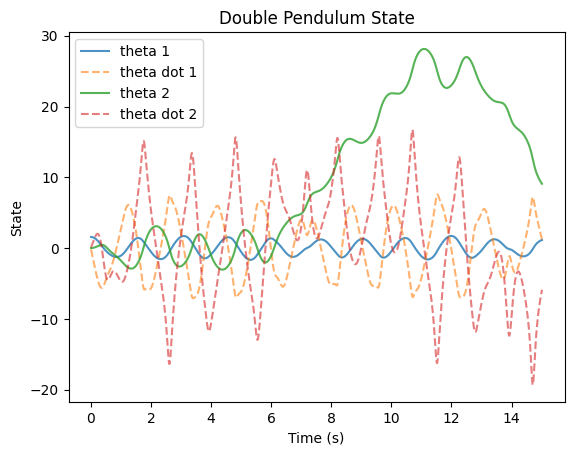

In [9]:
x1_0 = np.array([np.pi/2, 0.0, 0.0, 0.0])
x2_0 = np.array([np.pi, 0.0, 0.0, 0.0])

Tsim_RK4, Xsim_RK4, Usim_RK4 = double_pendulum.simulate(
              t0=0.0,
              x0=x1_0,
              tf=15.0,
              dt=0.01,
              controller=None,
              integrator="runge_kutta")

plot_timeseries(Tsim_RK4, Xsim_RK4, Usim_RK4)

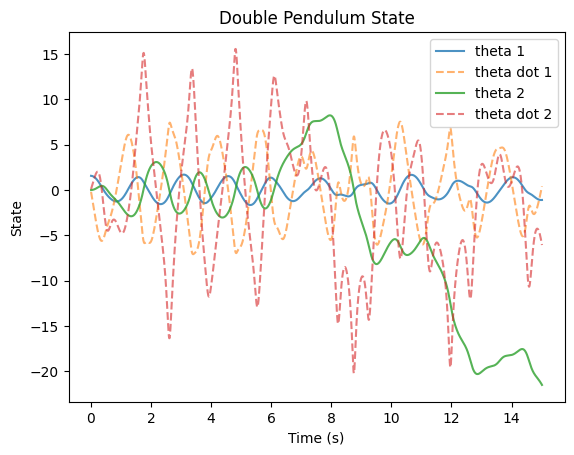

In [10]:
Tsim_RK4, Xsim_RK4, Usim_RK4 = double_pendulum.simulate(
              t0=0.0,
              x0=np.array([np.pi/2, -0.001, 0.0, 0.0]),
              tf=15.0,
              dt=0.01,
              controller=None,
              integrator="runge_kutta")

plot_timeseries(Tsim_RK4, Xsim_RK4, Usim_RK4)

##### Configuration 2

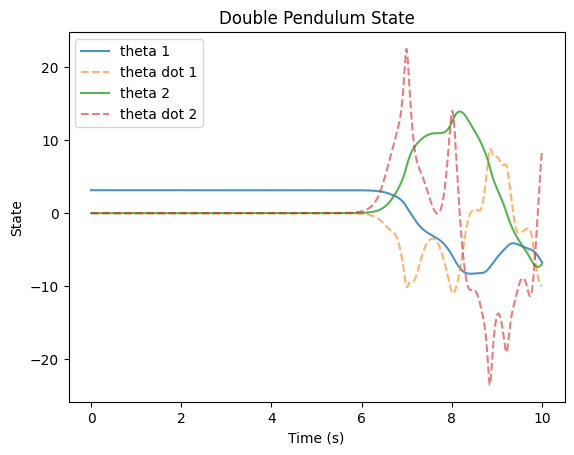

In [11]:
Tsim_RK4, Xsim_RK4, Usim_RK4 = double_pendulum.simulate(
              t0=0.0,
              x0=x2_0,
              tf=10.0,
              dt=0.001,
              controller=None,
              integrator="runge_kutta")

plot_timeseries(Tsim_RK4, Xsim_RK4, Usim_RK4)

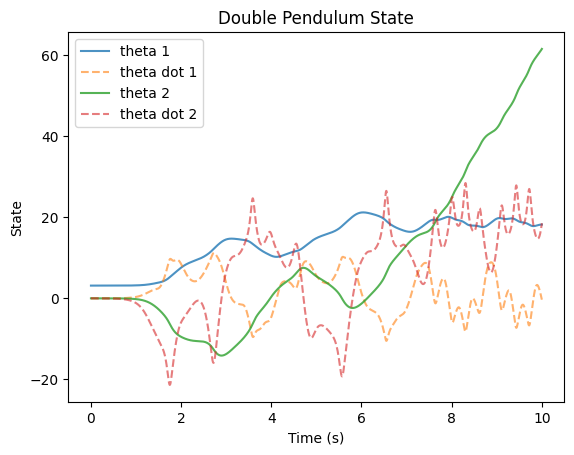

In [12]:

Tsim_RK4, Xsim_RK4, Usim_RK4 = double_pendulum.simulate(
              t0=0.0,
              x0=np.array([np.pi, -0.001, 0.0, 0.0]),
              tf=10.0,
              dt=0.001,
              controller=None,
              integrator="runge_kutta")

plot_timeseries(Tsim_RK4, Xsim_RK4, Usim_RK4)

### 3. Gravity Compensation Controller

In [13]:
from Double_Pendulum_Plant import GravityCompController

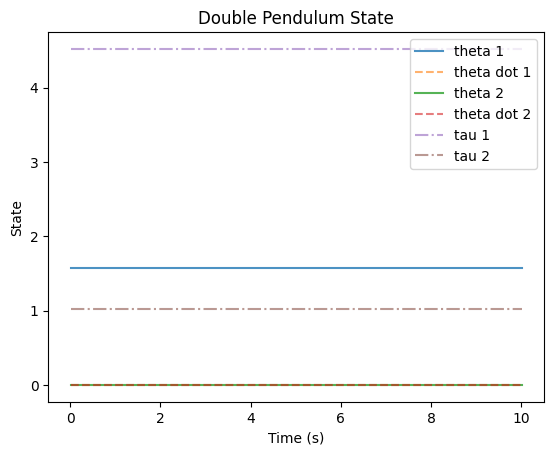

Torque of the system is:

tau1 = 4.5203 N*m
tau2 = 1.0259 N*m


In [14]:
grav_con = GravityCompController(m1, m2, l1, l2, r1, r2, g)

Tsim_RK4, Xsim_RK4, Usim_RK4 = double_pendulum.simulate(
              t0=0.0,
              x0=[np.pi/2, 0.0, 0.0, 0.0],
              tf=10.0,
              dt=0.01,
              controller=grav_con,
              integrator="runge_kutta")
plot_timeseries(Tsim_RK4, Xsim_RK4, Usim_RK4, torque_show=True)

print(f"Torque of the system is:\n")
print(f"tau1 = {Usim_RK4[0][0]:.4f} N*m")
print(f"tau2 = {Usim_RK4[0][1]:.4f} N*m")

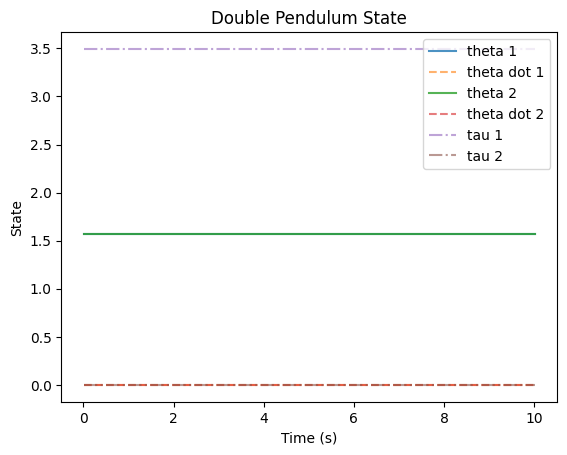

Torque of the system is:

tau1 = 3.4943 N*m
tau2 = 0.0000 N*m


In [15]:
Tsim_RK4, Xsim_RK4, Usim_RK4 = double_pendulum.simulate(
              t0=0.0,
              x0=[np.pi/2, np.pi/2, 0.0, 0.0],
              tf=10.0,
              dt=0.01,
              controller=grav_con,
              integrator="runge_kutta")
plot_timeseries(Tsim_RK4, Xsim_RK4, Usim_RK4, torque_show=True)

print(f"Torque of the system is:\n")
print(f"tau1 = {Usim_RK4[0][0]:.4f} N*m")
print(f"tau2 = {Usim_RK4[0][1]:.4f} N*m")

### 4. PFL + Energy Shaping Controller

In [16]:
from Double_Pendulum_Plant import PFLEnergyShapingController

tau_pfl: -0.009842484033060504

tau_es: -0.0

tau_pfl: -0.009842721244597794

tau_es: 0.0

tau_pfl: -0.009842958952110903

tau_es: 0.0

tau_pfl: -0.009843197156664454

tau_es: 0.0

tau_pfl: -0.009843435859275386

tau_es: 0.0

tau_pfl: -0.0098436750609127

tau_es: 0.0

tau_pfl: -0.009843914762497295

tau_es: 0.0

tau_pfl: -0.00984415496490175

tau_es: 0.0

tau_pfl: -0.00984439566895015

tau_es: 0.0

tau_pfl: -0.009844636875417869

tau_es: 0.0

tau_pfl: -0.009844878585031398

tau_es: 0.0

tau_pfl: -0.009845120798468157

tau_es: 0.0

tau_pfl: -0.009845363516356285

tau_es: 0.0

tau_pfl: -0.009845606739274483

tau_es: 0.0

tau_pfl: -0.009845850467751825

tau_es: 0.0

tau_pfl: -0.009846094702267565

tau_es: 0.0

tau_pfl: -0.009846339443250958

tau_es: 0.0

tau_pfl: -0.009846584691081102

tau_es: 0.0

tau_pfl: -0.009846830446086759

tau_es: 0.0

tau_pfl: -0.00984707670854616

tau_es: 0.0

tau_pfl: -0.009847323478686866

tau_es: 0.0

tau_pfl: -0.009847570756685586

tau_es: 0.0

tau_pfl: -0.00

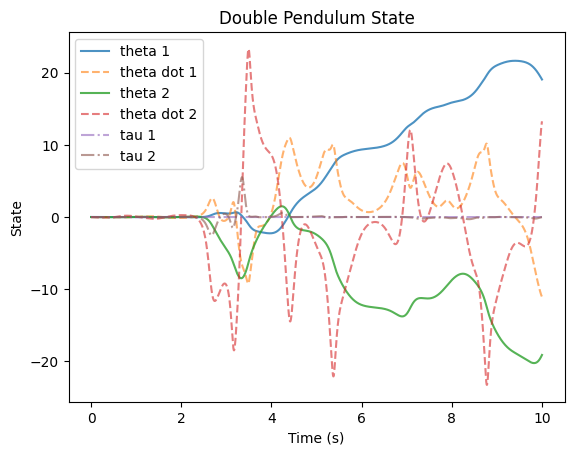

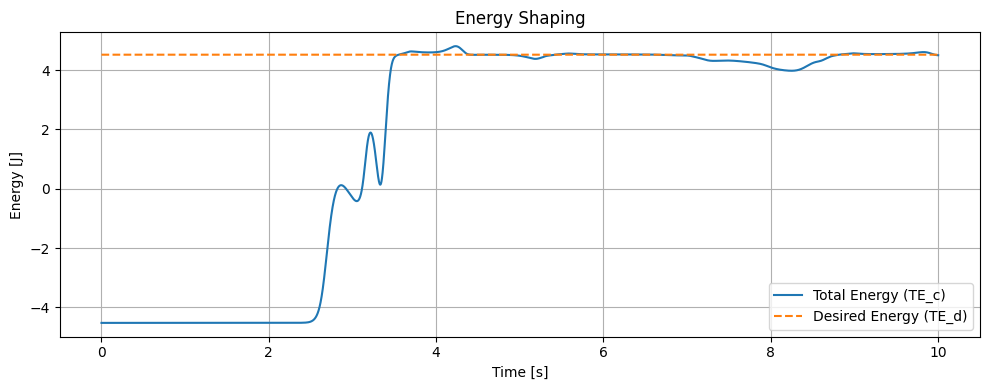

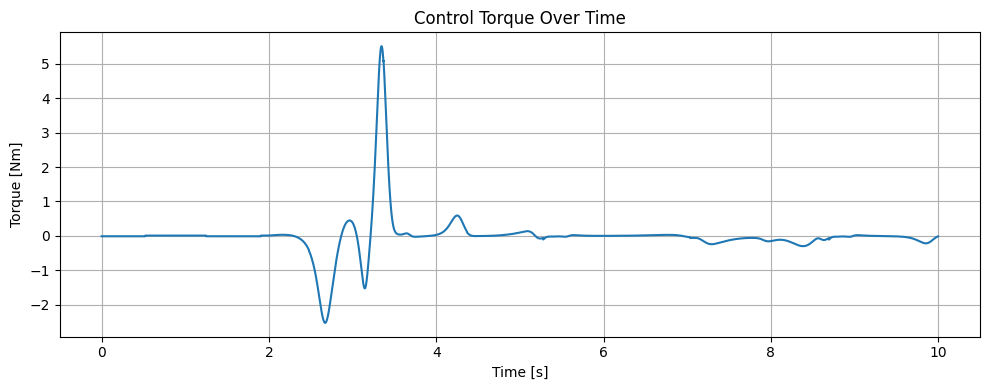

In [19]:
pfl_energy_shaping_controller = PFLEnergyShapingController(m1, m2, l1, l2, r1, r2, I1, I2, g, k_pfl=0.01, k_es=0.2, Kp=4, Kd=4)
Tsim_es, Xsim_es, Usim_es = double_pendulum.simulate(
              t0=0.0,
              x0=[0.01, 0.0, 0.0, 0.0],
              tf=10,
              dt=0.001,
              controller=pfl_energy_shaping_controller,
              integrator="runge_kutta")

plot_timeseries(Tsim_es, Xsim_es, Usim_es, torque_show=True)
pfl_energy_shaping_controller.plot_energy()

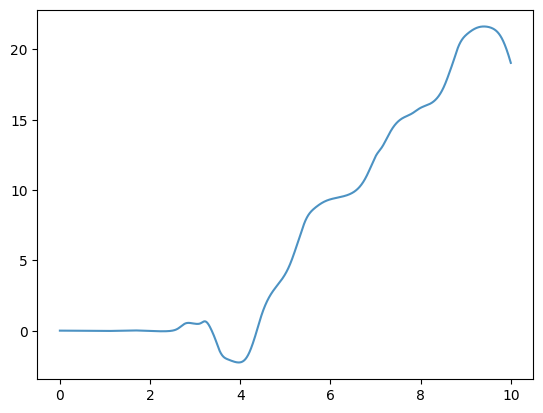

In [20]:
plt.plot(Tsim_es, np.asarray(Xsim_es).T[0], label="theta 1", alpha=0.8)